<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/immp_tpc_som_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import pylab as pl
import csv

In [24]:
class SOM(object):
    def __init__(self, X, output, iteration, batch_size):
        """
        :param X:  形状是N*D， 输入样本有N个,每个D维
        :param output: (n,m)一个元组，为输出层的形状是一个n*m的二维矩阵
        :param iteration:迭代次数
        :param batch_size:每次迭代时的样本数量
        初始化一个权值矩阵，形状为D*(n*m)，即有n*m权值向量，每个D维
        """
        self.X = X
        self.output = output
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = np.random.rand(X.shape[1], output[0] * output[1])
        print (self.W.shape)

    def GetN(self, t):
        """
        :param t:时间t, 这里用迭代次数来表示时间
        :return: 返回一个整数，表示拓扑距离，时间越大，拓扑邻域越小
        """
        a = min(self.output)
        return int(a-float(a)*t/self.iteration)

    def Geteta(self, t, n):
        """
        :param t: 时间t, 这里用迭代次数来表示时间
        :param n: 拓扑距离
        :return: 返回学习率，
        """
        return np.power(np.e, -n)/(t+2)

    def updata_W(self, X, t, winner):
        N = self.GetN(t)
        for x, i in enumerate(winner):
            to_update = self.getneighbor(i, N)   ## change i[0] to i
            for j in range(N+1):
                e = self.Geteta(t, j)
                for w in to_update[j]:
                    self.W[:, w] = np.add(self.W[:,w], e*(X[x,:] - self.W[:,w]))

    def getneighbor(self, index, N):
        """
        :param index:获胜神经元的下标
        :param N: 邻域半径
        :return ans: 返回一个集合列表，分别是不同邻域半径内需要更新的神经元坐标
        """
        a, b = self.output
        length = a*b
        def distence(index1, index2):
            i1_a, i1_b = index1 // a, index1 % b
            i2_a, i2_b = index2 // a, index2 % b
            return np.abs(i1_a - i2_a), np.abs(i1_b - i2_b)

        ans = [set() for i in range(N+1)]
        for i in range(length):
            dist_a, dist_b = distence(i, index)
            if dist_a <= N and dist_b <= N: ans[max(dist_a, dist_b)].add(i)
        return ans




    def train(self):
        """
        train_Y:训练样本与形状为batch_size*(n*m)
        winner:一个一维向量，batch_size个获胜神经元的下标
        :return:返回值是调整后的W
        """
        count = 0
        while self.iteration > count:
            train_X = self.X[np.random.choice(self.X.shape[0], self.batch_size)]
            normal_W(self.W)
            normal_X(train_X)
            train_Y = train_X.dot(self.W)
            winner = np.argmax(train_Y, axis=1).tolist()
            self.updata_W(train_X, count, winner)
            count += 1
        return self.W

    def train_result(self):
        normal_X(self.X)
        train_Y = self.X.dot(self.W)
        winner = np.argmax(train_Y, axis=1).tolist()
        print (winner)
        return winner

def normal_X(X):
    """
    :param X:二维矩阵，N*D，N个D维的数据
    :return: 将X归一化的结果
    """
    N, D = X.shape
    for i in range(N):
        temp = np.sum(np.multiply(X[i], X[i]))
        X[i] /= np.sqrt(temp)
    return X
def normal_W(W):
    """
    :param W:二维矩阵，D*(n*m)，D个n*m维的数据
    :return: 将W归一化的结果
    """
    for i in range(W.shape[1]):
        temp = np.sum(np.multiply(W[:,i], W[:,i]))
        W[:, i] /= np.sqrt(temp)
    return W

#画图
def draw(C):
    colValue = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
    for i in range(len(C)):
        coo_X = []    #x坐标列表
        coo_Y = []    #y坐标列表
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        pl.scatter(coo_X, coo_Y, marker='x', color=colValue[i%len(colValue)], label=i)

    pl.legend(loc='upper center')
    pl.show()


In [25]:
print("\nLoading TPC data into memory \n")
data_file = "vTestData102.csv"
#dataset = np.loadtxt(data_file, delimiter=",", usecols=range(0,15),dtype=np.float64)
#with open(data_file, 'r') as f:
#    data = list(csv.reader(f, delimiter=","))
#dataset = np.array(data, dtype=np.float)
#print(dataset.shape)
#dataset_old = dataset.copy()


Loading TPC data into memory 



In [26]:
df = pd.read_csv(data_file)

In [27]:
df

,CustomID,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2
0,C00001,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,C00002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,C00003,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,C00004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,C00005,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,C00191,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
191,C00192,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
192,C00193,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
193,C00194,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
cusid = df['CustomID']
df_old = df.copy()

In [29]:
df = df.drop('CustomID', axis=1)

In [30]:
dataset = np.array(df, dtype=np.float)
dataset_old = dataset.copy()
print(dataset.shape)

(195, 15)


<ipython-input-30-51939903ca90>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset = np.array(df, dtype=np.float)


In [31]:
som = SOM(dataset, (5, 5), 1, 30)
som.train()
res = som.train_result()

(15, 25)
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 4, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 4, 4, 4, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [46]:
df_old['group'] = pd.DataFrame(res)

In [47]:
df_old

,CustomID,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2,group
0,C00001,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
1,C00002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
2,C00003,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
3,C00004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
4,C00005,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,C00191,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
191,C00192,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
192,C00193,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11
193,C00194,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,11


In [48]:
df_old.to_csv('label_TestData.csv')

In [32]:
classify = {}
for i, win in enumerate(res):
    if not classify.get(win):   # change win[0] to win ==> three lines
        classify.setdefault(win, [i])
    else:
        classify[win].append(i)

In [33]:
C = []#未归一化的数据分类结果
D = []#归一化的数据分类结果
for i in classify.values():
    C.append(dataset_old[i].tolist())
    D.append(dataset[i].tolist())

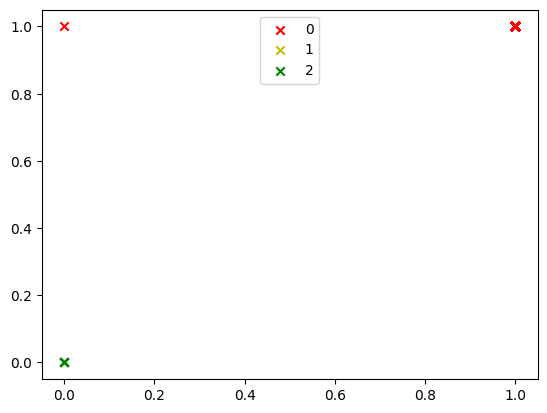

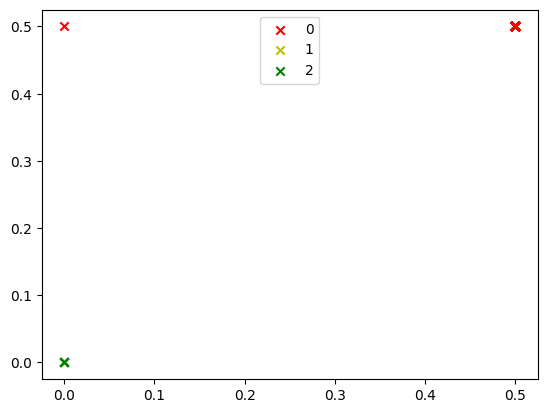

In [34]:
draw(C)
draw(D)

In [35]:
print('--------------------------------------------------------')
print(np.unique(res))
print(len(classify))

--------------------------------------------------------
[ 4  9 11]
3


In [36]:
values, counts = np.unique(res, return_counts=True)
print(values)
print(counts)
print('--------------------------------------------------------')

[ 4  9 11]
[  4   1 190]
--------------------------------------------------------


In [37]:
bb=dict(zip(list(res),[list(res).count(i) for i in list(res)]))
print(bb)

{11: 190, 9: 1, 4: 4}


In [38]:
max_key = max(bb, key=bb.get)

In [39]:
print(max_key)

11


In [40]:
df_out = list(zip(cusid,res))

In [41]:
df_out

[('C00001', 11),
 ('C00002', 11),
 ('C00003', 11),
 ('C00004', 11),
 ('C00005', 11),
 ('C00006', 11),
 ('C00007', 11),
 ('C00008', 11),
 ('C00009', 11),
 ('C00010', 11),
 ('C00011', 11),
 ('C00012', 11),
 ('C00013', 11),
 ('C00014', 11),
 ('C00015', 11),
 ('C00016', 11),
 ('C00017', 11),
 ('C00018', 11),
 ('C00019', 11),
 ('C00020', 11),
 ('C00021', 11),
 ('C00022', 11),
 ('C00023', 11),
 ('C00024', 11),
 ('C00025', 11),
 ('C00026', 11),
 ('C00027', 11),
 ('C00028', 11),
 ('C00029', 11),
 ('C00030', 11),
 ('C00031', 11),
 ('C00032', 11),
 ('C00033', 11),
 ('C00034', 11),
 ('C00035', 11),
 ('C00036', 11),
 ('C00037', 11),
 ('C00038', 11),
 ('C00039', 11),
 ('C00040', 9),
 ('C00041', 11),
 ('C00042', 11),
 ('C00043', 11),
 ('C00044', 11),
 ('C00045', 11),
 ('C00046', 11),
 ('C00047', 11),
 ('C00048', 11),
 ('C00049', 11),
 ('C00050', 11),
 ('C00051', 11),
 ('C00052', 11),
 ('C00053', 11),
 ('C00054', 11),
 ('C00055', 11),
 ('C00056', 11),
 ('C00057', 11),
 ('C00058', 11),
 ('C00059', 11)

In [42]:
check = []
for id,_group in df_out:
  if _group != max_key:
    check.append([id,_group])

In [43]:
check

[['C00040', 9], ['C00141', 4], ['C00179', 4], ['C00180', 4], ['C00181', 4]]

In [44]:
for id,_group in check:
  v = df.loc[df_old['CustomID'] == id]
  print(id,v)

C00040     A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
39  0  0  0  0   0   0   1   0   0   1   0   1   1   1   0
C00141      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
140  0  0  0  0   0   0   0   1   1   1   1   1   1   1   1
C00179      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
178  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1
C00180      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
179  0  0  0  0   0   1   1   0   1   0   1   0   1   1   1
C00181      A  B  C  D  A1  A2  A3  A4  B1  B2  B3  B4  C1  D1  D2
180  0  0  0  0   0   0   1   0   1   0   1   0   1   1   1
